In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
#leyendo el dataset
data = pd.read_csv('C:/Users/laboratorioesan/Downloads/xclara.csv', index_col=0)
print(data.shape)
data.head()

(3000, 2)


,V1,V2
1,2.072345,-3.241693
2,17.936710,15.784810
3,1.083576,7.319176
4,11.120670,14.406780
5,23.711550,2.557729


Text(0,0.5,u'V2')

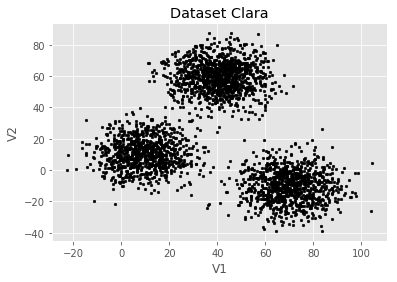

In [3]:
#plotando los datos
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
plt.title('Dataset Clara')
plt.xlabel('V1')
plt.ylabel('V2')
#plt.show()

In [4]:
#distancia euclidiana
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [5]:
# Numero de clusters
k = 3

# coordenadas X de centroides aleatorios
C_x = np.random.randint(0, np.max(X)-20, size=k)

# coordenadas Y de centroides aleatorios
C_y = np.random.randint(0, np.max(X)-20, size=k)

#imprimiendo
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[68. 31.]
 [54.  7.]
 [23. 11.]]


In [6]:
print(C_x,C_y)

(array([68, 54, 23]), array([31,  7, 11]))


Text(0,0.5,u'V2')

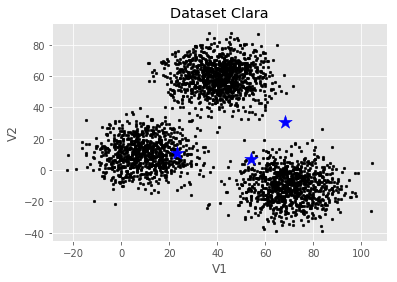

In [7]:
#plotando los centroides
plt.scatter(f1, f2, c=['black'], s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='blue')
plt.title('Dataset Clara')
plt.xlabel('V1')
plt.ylabel('V2')
#plt.show()

In [8]:
#ALGORITMO K-MEANS
# guardar los centroides conforme van siendo actualizados
C_old = np.zeros(C.shape)

# nombres/labels de los clusters (0, 1, 2)
clusters = np.zeros(len(X))

# funcion de error: distancia entre nuevos y antiguos centroides 
error = dist(C, C_old, None)

# repetir hasta convergir (error sea cero o casi cero)
while error != 0:
    # Asignar cada valaor a su cluster cercano
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # almacenar el antiguo centroide
    C_old = deepcopy(C)
    # encontrar los nuevos centroides mediante el calculo de la mediana
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

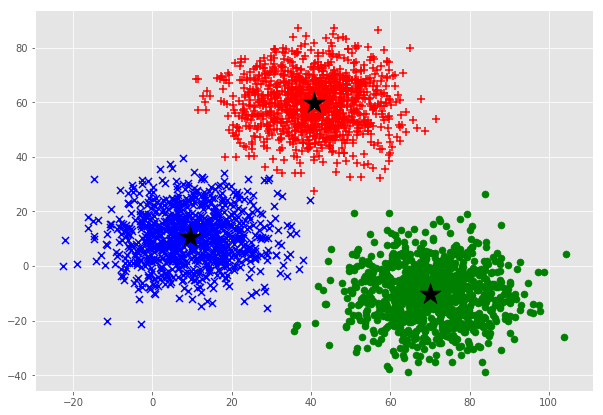

In [9]:
#visualizando kmeans
colors = ['r', 'g', 'b', 'y', 'c', 'm']
mark = ['+','o','x']

fig, ax = plt.subplots(figsize=(10,7))
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=50, c=colors[i],marker=mark[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=500, c='black',)
plt.show()

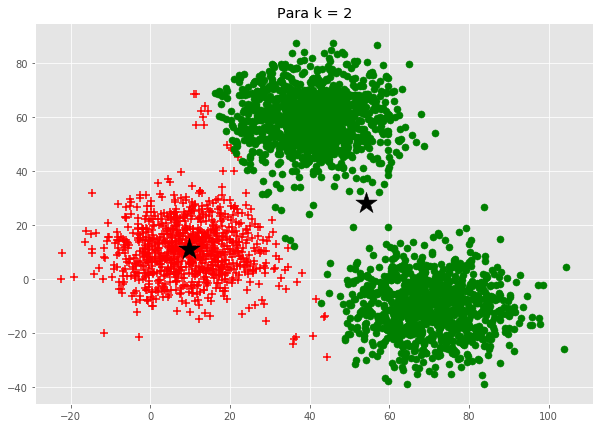

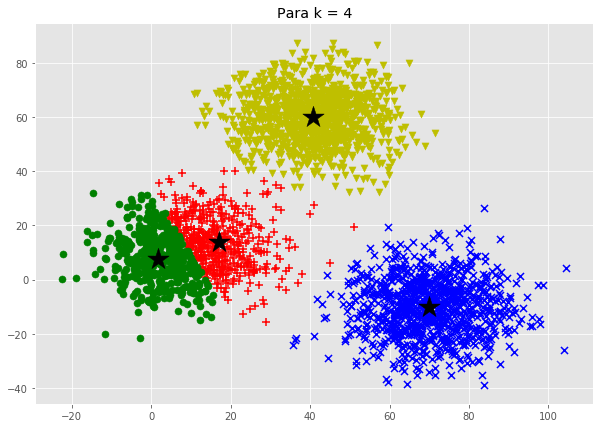

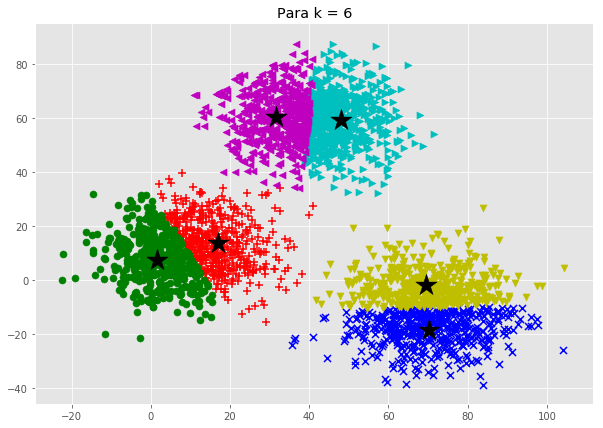

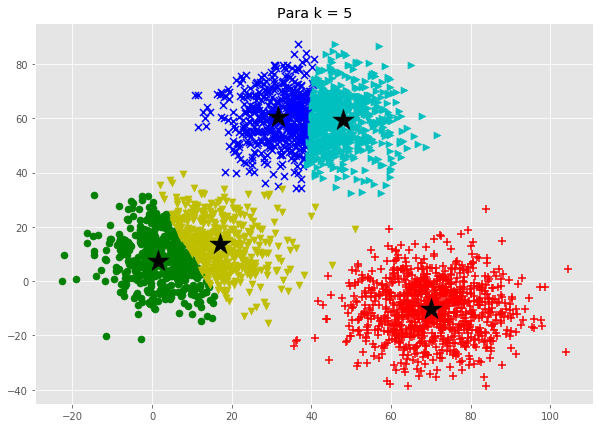

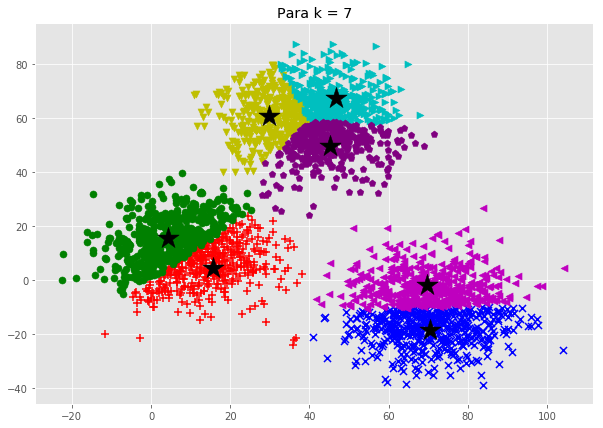

In [11]:
k = [2,4,6,5,7]

for k in k:
    
    k = k

    # coordenadas X de centroides aleatorios
    C_x = np.random.randint(0, np.max(X)-20, size=k)

    # coordenadas Y de centroides aleatorios
    C_y = np.random.randint(0, np.max(X)-20, size=k)

    #imprimiendo
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

    #ALGORITMO K-MEANS
    # guardar los centroides conforme van siendo actualizados
    C_old = np.zeros(C.shape)

    # nombres/labels de los clusters (0, 1, 2)
    clusters = np.zeros(len(X))

    # funcion de error: distancia entre nuevos y antiguos centroides 
    error = dist(C, C_old, None)

    # repetir hasta convergir (error sea cero o casi cero)
    while error != 0:
        # Asignar cada valaor a su cluster cercano
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # almacenar el antiguo centroide
        C_old = deepcopy(C)
        # encontrar los nuevos centroides mediante el calculo de la mediana
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
    #visualizando kmeans
    colors = ['r', 'g', 'b', 'y', 'c', 'm','purple']
    mark = ['+','o','x','v','>','<','p']    

    fig, ax = plt.subplots(figsize=(10,7))

    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=50, c=colors[i],marker=mark[i])    

    ax.scatter(C[:, 0], C[:, 1], marker='*', s=500, c='black',)    
    plt.title('Para k = '+str(k))
    plt.show()       